# Test NAS deployed on the NODE board using the OKAERTool

This notebook is a simple example of how to test a NAS model deployed on the NODE board using the OKAERTool. The OKAERTool is a Python package that provides a simple interface to interact with the OKAERTool board. The OKAERTool board is a low-cost, open-source hardware platform that can be used to deploy and test AER based systems on the edge.

## Monitoring the NAS output
The okaertool is plugged into the Node board where a stereo 64 channels NAS is deployed. The script below initializes the OKAERTool and starts monitoring the output of the NAS. The output of the NAS is plotted using pyNAVIS tool.

In [2]:
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '../src')

import okaertool as okt
from pyNAVIS import *
import time

# Create a new intance of the OkaerTool class and initialize it
okaer = okt.Okaertool()
okaer.init()

# Create a new instance of the PyNAVIS class
settings = MainSettings(num_channels=64, mono_stereo=1, on_off_both=1, address_size=4, ts_tick=0.01, bin_size=10000)

04/30/25 12:17:40 PM - INFO : No bit file loaded. Ensure that the FPGA is already programmed
04/30/25 12:17:40 PM - INFO : okaertool initialized as idle


### Monitor using a fixed amount of spikes
The script below monitors the output of the NAS for a fixed amount of spikes. The number of spikes to monitor can be set using the `max_spikes` parameter in the `monitor` function.

In [ ]:
# Reset the board
okaer.reset_board()

# Monitor the inputs
spikes = okaer.monitor(inputs=['port_c'], max_spikes=100000)
# Print the number of spikes for each input
for i in range(len(spikes)):
    print("Input", i, ":", spikes[i].get_num_spikes())

# Create a new pyNAVIS spike_file
spike_file = SpikesFile(addresses=spikes[2].addresses, timestamps=spikes[2].timestamps)
Plots.spikegram(spike_file, settings)
Plots.sonogram(spike_file, settings)
Plots.histogram(spike_file, settings)
Plots.average_activity(spike_file, settings)


04/30/25 12:18:59 PM - INFO : Board reset
04/30/25 12:18:59 PM - INFO : Buffer length: 800768
04/30/25 12:19:09 PM - ERROR : Error at monitor: Timeout


TypeError: object of type 'NoneType' has no len()

### Monitor using a fixed amount of time
The script below monitors the output of the NAS for a fixed amount of time. The time to monitor can be set using the `max_time` parameter in the `duration` function.

03/24/25 11:23:26 AM - INFO : Board reset
03/24/25 11:23:26 AM - INFO : Buffer length: 1024
03/24/25 11:23:36 AM - INFO : Monitoring duration: 10.000631332397461 seconds
03/24/25 11:23:36 AM - INFO : Number of spikes: 1682560. Number of read bytes: 13460480


Input 0 : 0
Input 1 : 0
Input 2 : 1682560


(array([8880., 7726., 5424., 4344., 3721., 3404., 3099., 3137., 3081.,
        2527., 2477., 3107., 2486., 2641., 3124., 2345., 2273., 1833.,
        2223., 2621., 2382., 1849., 1582., 1845., 2887., 2784., 2164.,
        1923., 1595., 1319., 1491., 2226., 2641., 2773., 3181., 4282.,
        4229., 3204., 2412., 2249., 1455., 1669., 1450., 1218., 1491.,
        1916., 1455., 1412., 1206., 1007.,  969., 1417., 1360., 1125.,
        1196., 1407., 1695., 1756., 1424., 1118., 1066., 1117., 1450.,
        1470., 1317., 1720., 1886., 1835., 1668., 1325., 1518., 1083.,
         982., 1096., 1250., 1538., 1371., 1444., 1652., 1468., 1160.,
        1387., 1483., 1740., 1662., 1127., 1314., 1904., 1307., 1765.,
        2071., 2166., 2153., 1975., 1304., 1128., 1270., 1180.,  904.,
        1080., 1241., 1243., 1081., 1310., 1355., 1089., 1077., 1137.,
        1354., 1387., 1356., 1323., 1373., 1633., 1600., 1522., 1320.,
        1242., 1281., 1327., 1458., 1479., 1449., 1598., 1260., 1177.,
      

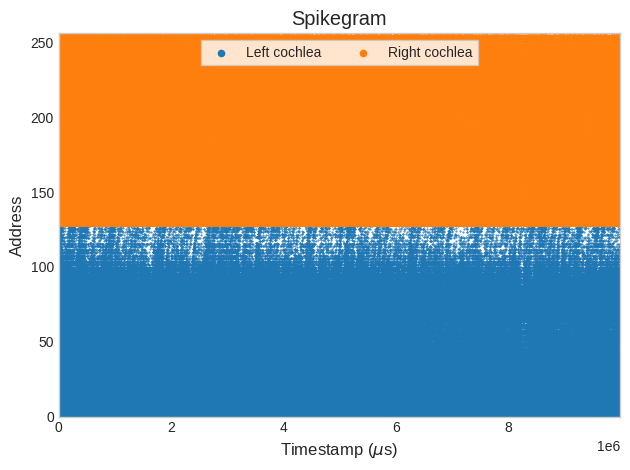

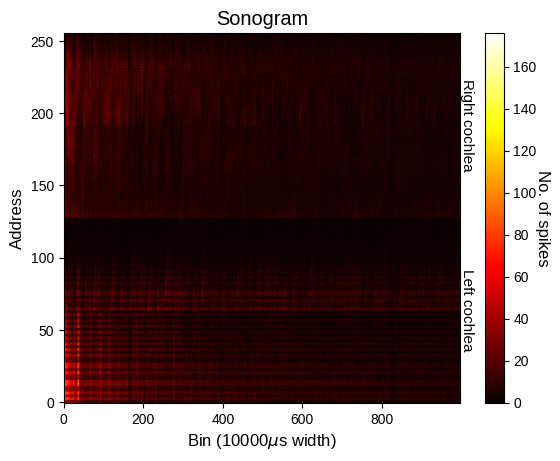

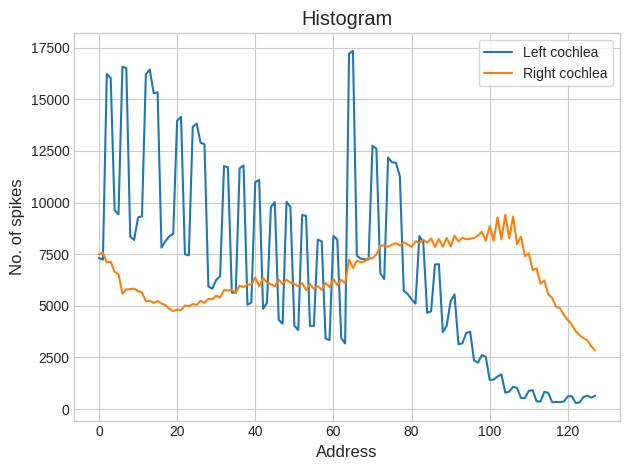

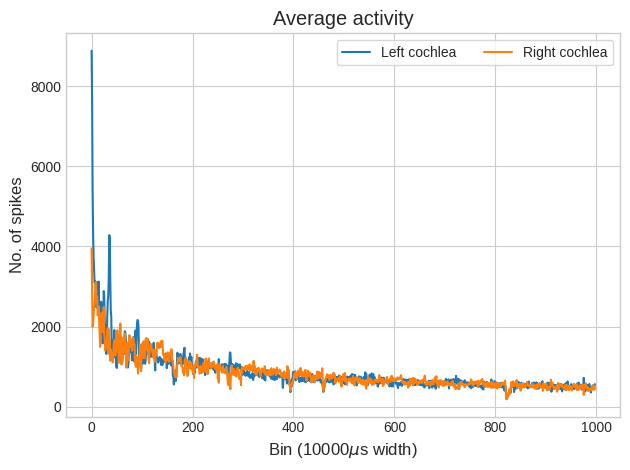

In [ ]:
# Reset the board
okaer.reset_board()

# Monitor the inputs
spikes = okaer.monitor(inputs=['port_c'], duration=10)

# Print the number of spikes for each input
for i in range(len(spikes)):
    print("Input", i, ":", spikes[i].get_num_spikes())

# Create a new pyNAVIS spike_file
spike_file = SpikesFile(addresses=spikes[2].addresses, timestamps=spikes[2].timestamps)
Plots.spikegram(spike_file, settings)
Plots.sonogram(spike_file, settings)
Plots.histogram(spike_file, settings)
Plots.average_activity(spike_file, settings)

### Monitor using a fixed amount of spikes and time
The script below monitors the output of the NAS for a fixed amount of spikes and time. The number of spikes to monitor can be set using the `max_spikes` parameter in the `monitor` function and the time to monitor can be set using the `max_time` parameter in the `duration` function. The script will stop monitoring when either the number of spikes or the time limit is reached.

In [ ]:
# Reset the board
okaer.reset_board()


# Monitor the inputs
spikes = okaer.monitor(inputs=['port_c'], max_spikes=1000000, duration=3)

# Print the number of spikes for each input
for i in range(len(spikes)):
    print("Input", i, ":", spikes[i].get_num_spikes())

# Create a new pyNAVIS spike_file
spike_file = SpikesFile(addresses=spikes[2].addresses, timestamps=spikes[2].timestamps)
Plots.spikegram(spike_file, settings)
Plots.sonogram(spike_file, settings)
Plots.histogram(spike_file, settings)
Plots.average_activity(spike_file, settings)

### Monitor forever until the user stops the monitoring
The script below monitors the output of the NAS forever until the user stops the monitoring by calling the `stop_monitor` function.

In [ ]:
# Reset the board
okaer.reset_board()

# Monitor the inputs
okaer.monitor_forever(inputs=['port_c'])

# Wait for some time emulating a real-time application
time.sleep(30)

# Stop the monitoring
spikes = okaer.monitor_stop()

# Print the number of spikes for each input
for i in range(len(spikes)):
    print("Input", i, ":", spikes[i].get_num_spikes())

# Create a new pyNAVIS spike_file
spike_file = SpikesFile(addresses=spikes[2].addresses, timestamps=spikes[2].timestamps)
Plots.spikegram(spike_file, settings)
Plots.sonogram(spike_file, settings)
Plots.histogram(spike_file, settings)
Plots.average_activity(spike_file, settings)